In [1]:
import random

In [2]:
askers = ['rojan', 'marco', 'matt', 'jan', 'daniel', 'ben', 'emy', 'patrick']

for i in range(5):
    ask_order = random.sample(askers, len(askers))
    print(ask_order)

['emy', 'jan', 'ben', 'rojan', 'daniel', 'patrick', 'marco', 'matt']
['marco', 'jan', 'patrick', 'matt', 'daniel', 'ben', 'emy', 'rojan']
['jan', 'emy', 'matt', 'daniel', 'rojan', 'patrick', 'marco', 'ben']
['marco', 'emy', 'matt', 'ben', 'daniel', 'jan', 'patrick', 'rojan']
['matt', 'daniel', 'marco', 'patrick', 'emy', 'ben', 'rojan', 'jan']


# Owl drawing

Also using imports based on the recently updated pymc v4.

Linear regression

In [11]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats
from scipy.special import expit, logit
import seaborn as sns
import xarray as xr

In [25]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)
sns.set_context('talk')
az.rcParams["stats.hdi_prob"] = 0.89  # sets default credible interval used by arviz

def standardize(x):
    x = (x - np.mean(x)) / np.std(x)
    return x

In [20]:
# priors for paraameter values
alpha_vals = np.arange(start=-2, stop=3, step=1)
beta_vals = np.arange(start=-2, stop=3, step=1)
sigma_vals = [0.25, 0.5, 1, 1.5, 2]
print('alpha values: ', alpha_vals)
print('beta values: ', beta_vals)
print('sigma values: ', sigma_vals)

alpha values:  [-2 -1  0  1  2]
beta values:  [-2 -1  0  1  2]
sigma values:  [0.25, 0.5, 1, 1.5, 2]


In [43]:
# discrete symmetric distribution (like a normal)
alpha_probs = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
beta_probs = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
sigma_probs = np.array([0.3, 0.25, 0.20, 0.15, 0.1])
print('alpha probs: ', alpha_probs)
print('beta probs: ', beta_probs)
print('sigma probs: ', sigma_probs)

alpha probs:  [0.1 0.2 0.4 0.2 0.1]
beta probs:  [0.1 0.2 0.4 0.2 0.1]
sigma probs:  [0.3  0.25 0.2  0.15 0.1 ]


In [44]:
sum(sigma_probs)

1.0

In [45]:
alpha_prior = dict(zip(alpha_vals,alpha_probs))
beta_prior = dict(zip(beta_vals,beta_probs))
sigma_prior = dict(zip(sigma_vals,sigma_probs))

[Text(0.5, 1.0, 'sigma prior')]

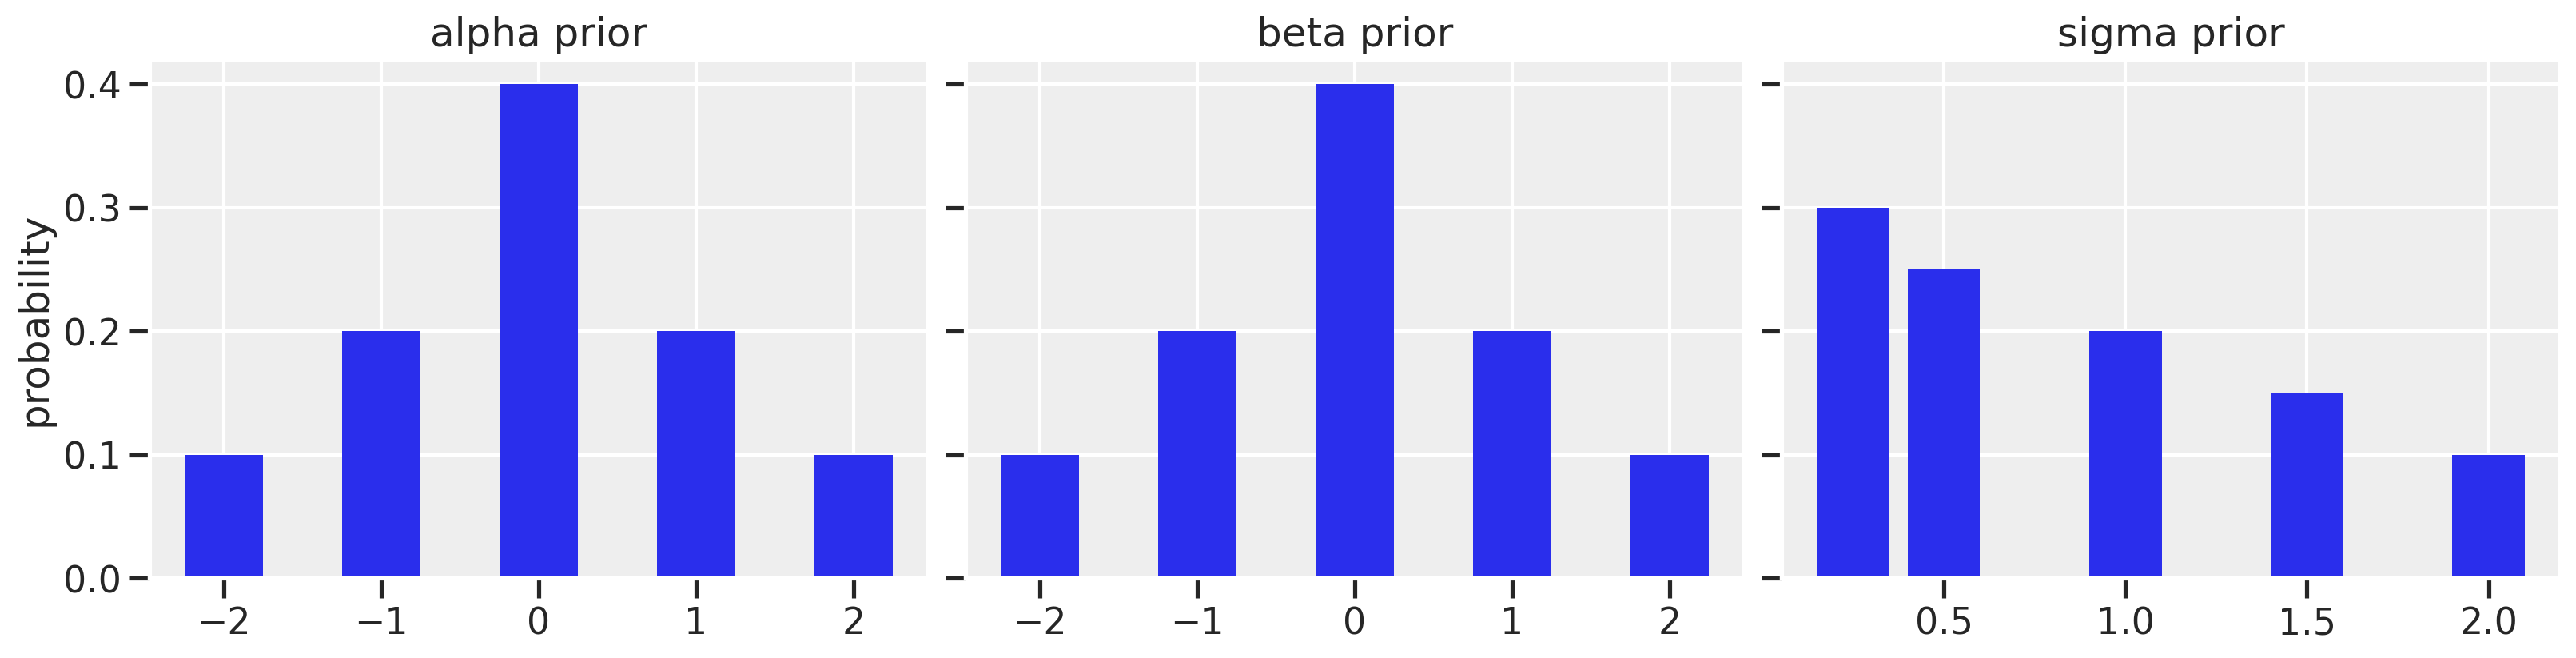

In [56]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16,4), sharey=True)
ax0.bar(alpha_vals, alpha_probs, width=0.5)
ax1.bar(beta_vals, beta_probs, width=0.5)
ax2.bar(sigma_vals, sigma_probs, width=0.2)
ax0.set(title='alpha prior', ylabel='probability')
ax1.set(title='beta prior')
ax2.set(title='sigma prior')

In [68]:
a_samples = np.random.choice(a=alpha_vals, p=alpha_probs, size=100)
b_samples = np.random.choice(a=beta_vals, p=beta_probs, size=100)
s_samples = np.random.choice(a=sigma_vals, p=sigma_probs, size=100)

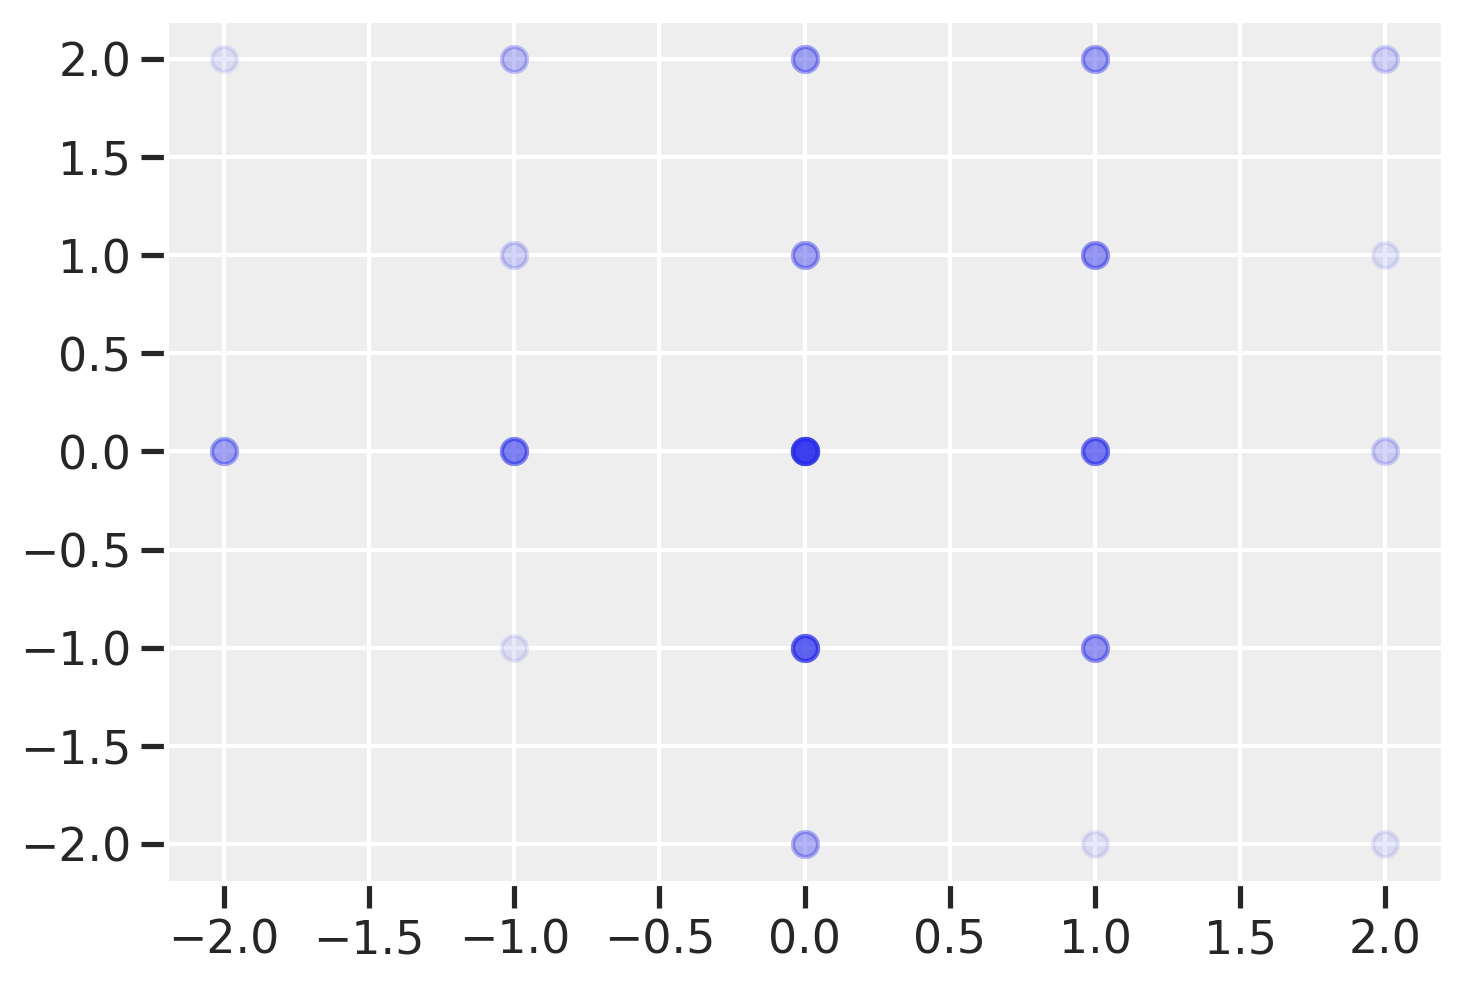

In [81]:
plt.scatter(a_samples, b_samples, alpha=0.1)

In [58]:
# xvals are 20 values between -2 and 2
xvals = np.linspace(-2, 2, 20)
xvals

array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ])

Each x value should have a mu generated from the samples

In [69]:
b_samples.shape

(100,)

In [70]:
xvals.shape

(20,)

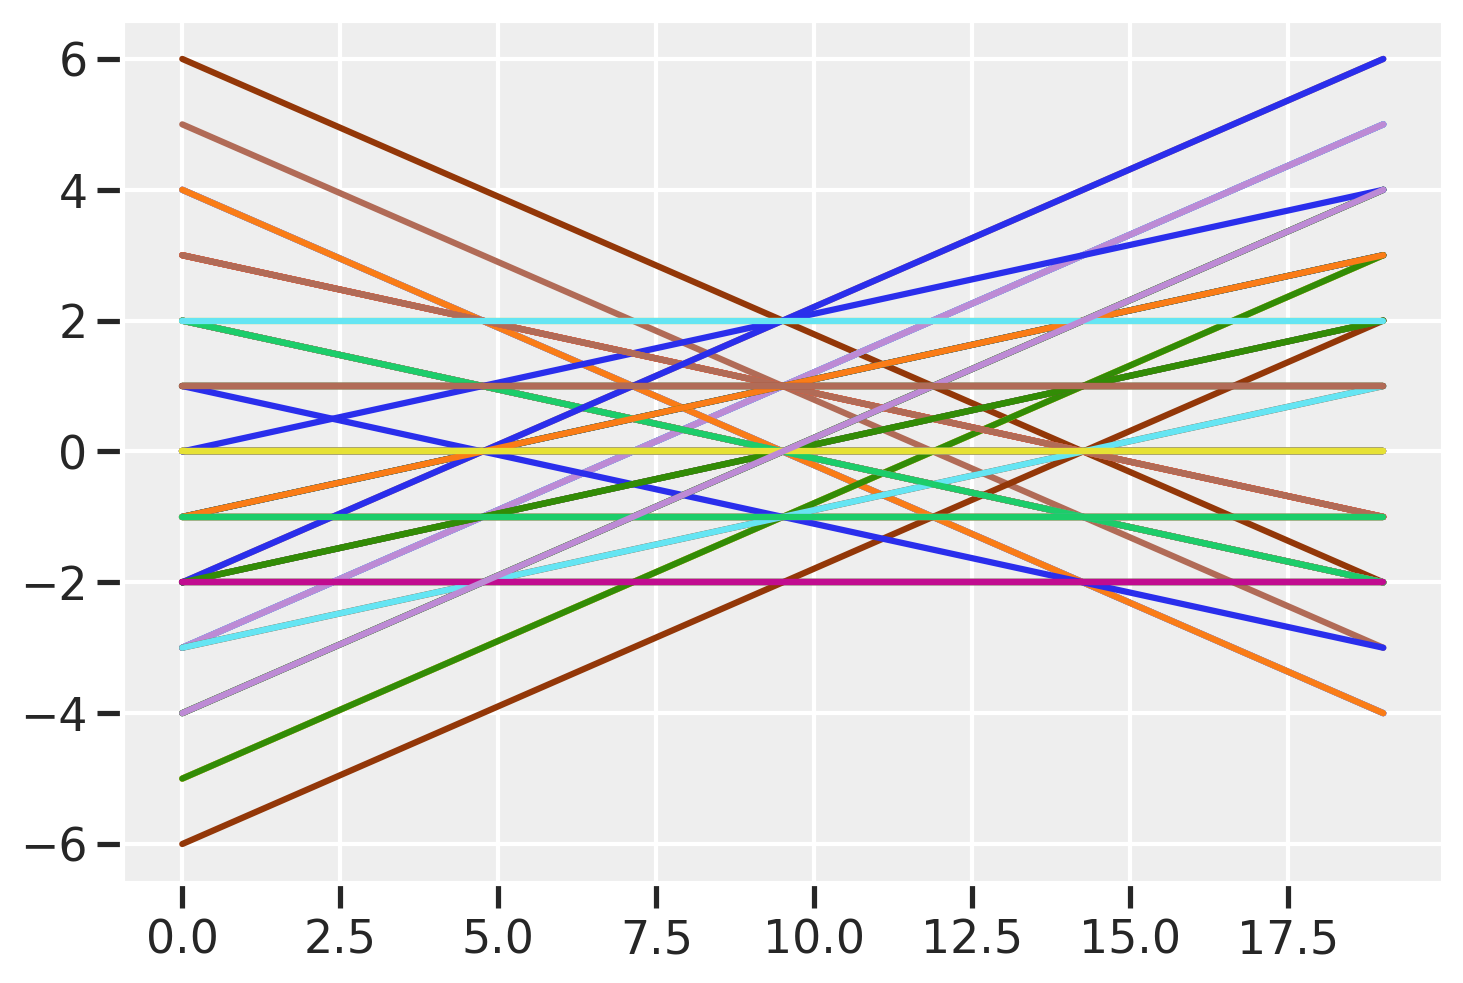

In [79]:
plt.plot(b_samples * xvals.reshape(20,1) + a_samples)

In [59]:
# create a matrix for each combination of alpha and beta at their probabilities
alpha_mat = np.array([[alpha_prior[alpha] for alpha in alpha_vals] for beta in beta_vals])

In [60]:
alpha_mat

array([[0.1, 0.2, 0.4, 0.2, 0.1],
       [0.1, 0.2, 0.4, 0.2, 0.1],
       [0.1, 0.2, 0.4, 0.2, 0.1],
       [0.1, 0.2, 0.4, 0.2, 0.1],
       [0.1, 0.2, 0.4, 0.2, 0.1]])

In [9]:
# get samples from prior
# alpha_samples = alpha_prior

What is the probability of seeing weight at 2.5 with a height of 1.0?

In [ ]:
# plot a single data line comprised of two points with these values
# alpha 0, beta 1


Apply Bayes rule

$$ \text{P}(\text{T10} | \text{18H}) = \frac{\text{P}(\text{18H} | \text{T10})\text{P}(\text{T10})}{\text{P}(\text{18H})} $$




$$ \text{P}(\alpha distribution | \alpha=0) = \frac{\text{P}(\alpha=0 | \text{T10})\text{P}(\text{T10})}{\text{P}(\text{18H})} $$



In [8]:
%load_ext watermark
%watermark -n -u -v -iv -w -p aesara,aeppl

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Fri Jun 17 2022

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.3.0

aesara: 2.6.6
aeppl : 0.0.31

scipy     : 1.8.1
matplotlib: 3.5.1
arviz     : 0.12.1
xarray    : 0.20.1
seaborn   : 0.11.2
numpy     : 1.22.4
pandas    : 1.4.2
sys       : 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:03:09) [Clang 13.0.1 ]
pymc      : 4.0.0

Watermark: 2.3.1

